In [1]:
import numpy as np
import pickle
from scipy.stats import binom
import matplotlib.pyplot as plt
import pandas as pd 
import pickle

%matplotlib inline

np.random.seed(0)

In [2]:
data = pd.read_table('../data/data_nam.txt', sep=' ',header=0)

In [3]:
data.head()

,IndivID,PopID,Pop,Country,Continent,sex,lat,long,L1.125,L1.130,...,L677.255.553287981859,L677.259,L677.263,L677.267,L678.202,L678.206,L678.209.848101265823,L678.210,L678.214,L678.218
Chipewyan29,2012,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,0,1,0,0
Chipewyan31,2156,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,1,0,0,0
Chipewyan33,2381,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,1,0,0,0,0
Chipewyan35,2382,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,0,0,0,0,0,0,1,0,0
Chipewyan37,2383,811,Chipewyan,Canada,AMERICA,0,59.55,-107.3,0,0,...,0,1,0,0,0,0,0,1,0,0


# Analysis

Names of the different populations.

In [4]:
print('Names of the different populations:\n', np.unique(data['Pop']), '\n')
print('Number of populations: ', len(np.unique(data['Pop'])))

Names of the different populations:
 ['Ache' 'Arhuaco' 'Aymara' 'Cabecar' 'Chipewyan' 'Cree' 'Embera' 'Guarani'
 'Guaymi' 'Huilliche' 'Inga' 'Kaingang' 'Kaqchikel' 'Karitiana' 'Kogi'
 'Maya' 'Mixe' 'Mixtec' 'Ojibwa' 'Piapoco' 'Pima' 'Quechua' 'Surui'
 'TicunaArara' 'Waunana' 'Wayuu' 'Zapotec'] 

Number of populations:  27


In [5]:
print('Coordinates of the different populations:\n')
data[['Pop', 'long', 'lat']].set_index('Pop').drop_duplicates()

Coordinates of the different populations:



,long,lat
Pop,,
Chipewyan,-107.3,59.55
Cree,-102.5,50.33
Ojibwa,-81.0,46.50
Kaqchikel,-91.0,15.00
Mixtec,-97.0,17.00
Mixe,-96.0,17.00
Zapotec,-97.0,16.00
Guaymi,-82.0,8.50
Cabecar,-84.0,9.50


## PCA and Regression : Data

In [6]:
data_aux = data.copy()
data_aux = data_aux.drop(data.columns[0:6], axis=1)
x = data_aux.drop(data_aux.columns[0:2], axis=1).values
y_long = data['long'].values
y_lat = data['lat'].values

In [7]:
# Save data.
# pickle.dump(x, open('../data/data_nam_clean.matrix', 'wb'), -1)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(100).fit(x)
comp = pca.transform(x)

In [9]:
from sklearn.linear_model import LinearRegression

reg_long = LinearRegression()
reg_lat = LinearRegression()

reg_long.fit(comp, y_long)
reg_lat.fit(comp, y_lat)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
x_long = reg_long.predict(comp)
x_lat = reg_lat.predict(comp)

## PCA and Regression : Generated Data

In [17]:
import matplotlib.pyplot as plt 

x_gen = np.load('../generated/synthetic_data_nam.npy')

In [18]:
x_gen = np.round(x_gen)

In [19]:
from sklearn.decomposition import PCA

pca_gen = PCA(100).fit(x_gen)
comp_gen = pca.transform(x_gen)

In [20]:
x_gen_long = reg_long.predict(comp_gen)
x_gen_lat = reg_lat.predict(comp_gen)

# Comparison

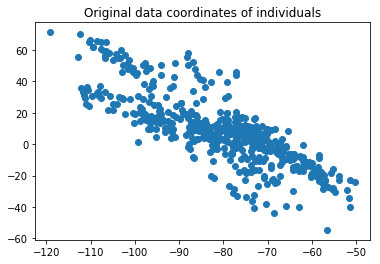

In [21]:
plt.scatter(x_long, x_lat)
plt.title('Original data coordinates of individuals')

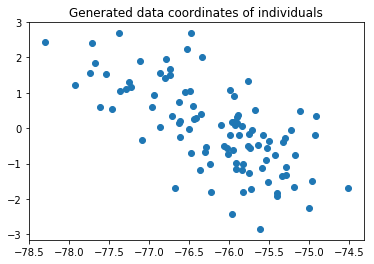

In [22]:
plt.scatter(x_gen_long, x_gen_lat )
plt.title('Generated data coordinates of individuals')